project

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from tqdm import tqdm

In [2]:
df = pd.read_csv('/Users/poojayendhe/Downloads/airline_passenger_satisfaction.csv')

In [3]:
df.shape

(129880, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   ID                                      129880 non-null  int64  
 1   Gender                                  129880 non-null  object 
 2   Age                                     129880 non-null  int64  
 3   Customer Type                           129880 non-null  object 
 4   Type of Travel                          129880 non-null  object 
 5   Class                                   129880 non-null  object 
 6   Flight Distance                         129880 non-null  int64  
 7   Departure Delay                         129880 non-null  int64  
 8   Arrival Delay                           129487 non-null  float64
 9   Departure and Arrival Time Convenience  129880 non-null  int64  
 10  Ease of Online Booking                  1298

In [5]:
df.head(5)

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
df.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [7]:
df.isnull().sum()

ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [8]:
df.duplicated().sum()

0

In [9]:

df.skew(axis = 0, skipna = True)

/var/folders/f_/t6r5bs0j3sx9wt2l8jz9jft00000gn/T/ipykernel_73112/1806754799.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.skew(axis = 0, skipna = True)


ID                                        0.000000
Age                                      -0.003606
Flight Distance                           1.108142
Departure Delay                           6.821980
Arrival Delay                             6.670125
Departure and Arrival Time Convenience   -0.332469
Ease of Online Booking                   -0.018779
Check-in Service                         -0.366569
Online Boarding                          -0.456911
Gate Location                            -0.058265
On-board Service                         -0.421320
Seat Comfort                             -0.485818
Leg Room Service                         -0.348414
Cleanliness                              -0.300926
Food and Drink                           -0.155063
In-flight Service                        -0.691580
In-flight Wifi Service                    0.040465
In-flight Entertainment                  -0.366385
Baggage Handling                         -0.677400
dtype: float64

In [10]:
arrival_median = df['Arrival Delay'].median()
print(arrival_median)

0.0


In [11]:
df['Arrival Delay'].fillna(arrival_median,inplace= True)

In [12]:
df.isnull().sum()

ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [13]:
df= df.drop(['ID'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [14]:
df.dtypes

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


In [15]:
df.shape

(129880, 23)

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Flight Distance'}>,
        <AxesSubplot: title={'center': 'Departure Delay'}>,
        <AxesSubplot: title={'center': 'Arrival Delay'}>],
       [<AxesSubplot: title={'center': 'Departure and Arrival Time Convenience'}>,
        <AxesSubplot: title={'center': 'Ease of Online Booking'}>,
        <AxesSubplot: title={'center': 'Check-in Service'}>,
        <AxesSubplot: title={'center': 'Online Boarding'}>],
       [<AxesSubplot: title={'center': 'Gate Location'}>,
        <AxesSubplot: title={'center': 'On-board Service'}>,
        <AxesSubplot: title={'center': 'Seat Comfort'}>,
        <AxesSubplot: title={'center': 'Leg Room Service'}>],
       [<AxesSubplot: title={'center': 'Cleanliness'}>,
        <AxesSubplot: title={'center': 'Food and Drink'}>,
        <AxesSubplot: title={'center': 'In-flight Service'}>,
        <AxesSubplot: title={'center': 'In-flight Wifi Service'}>],
       [<AxesSubpl

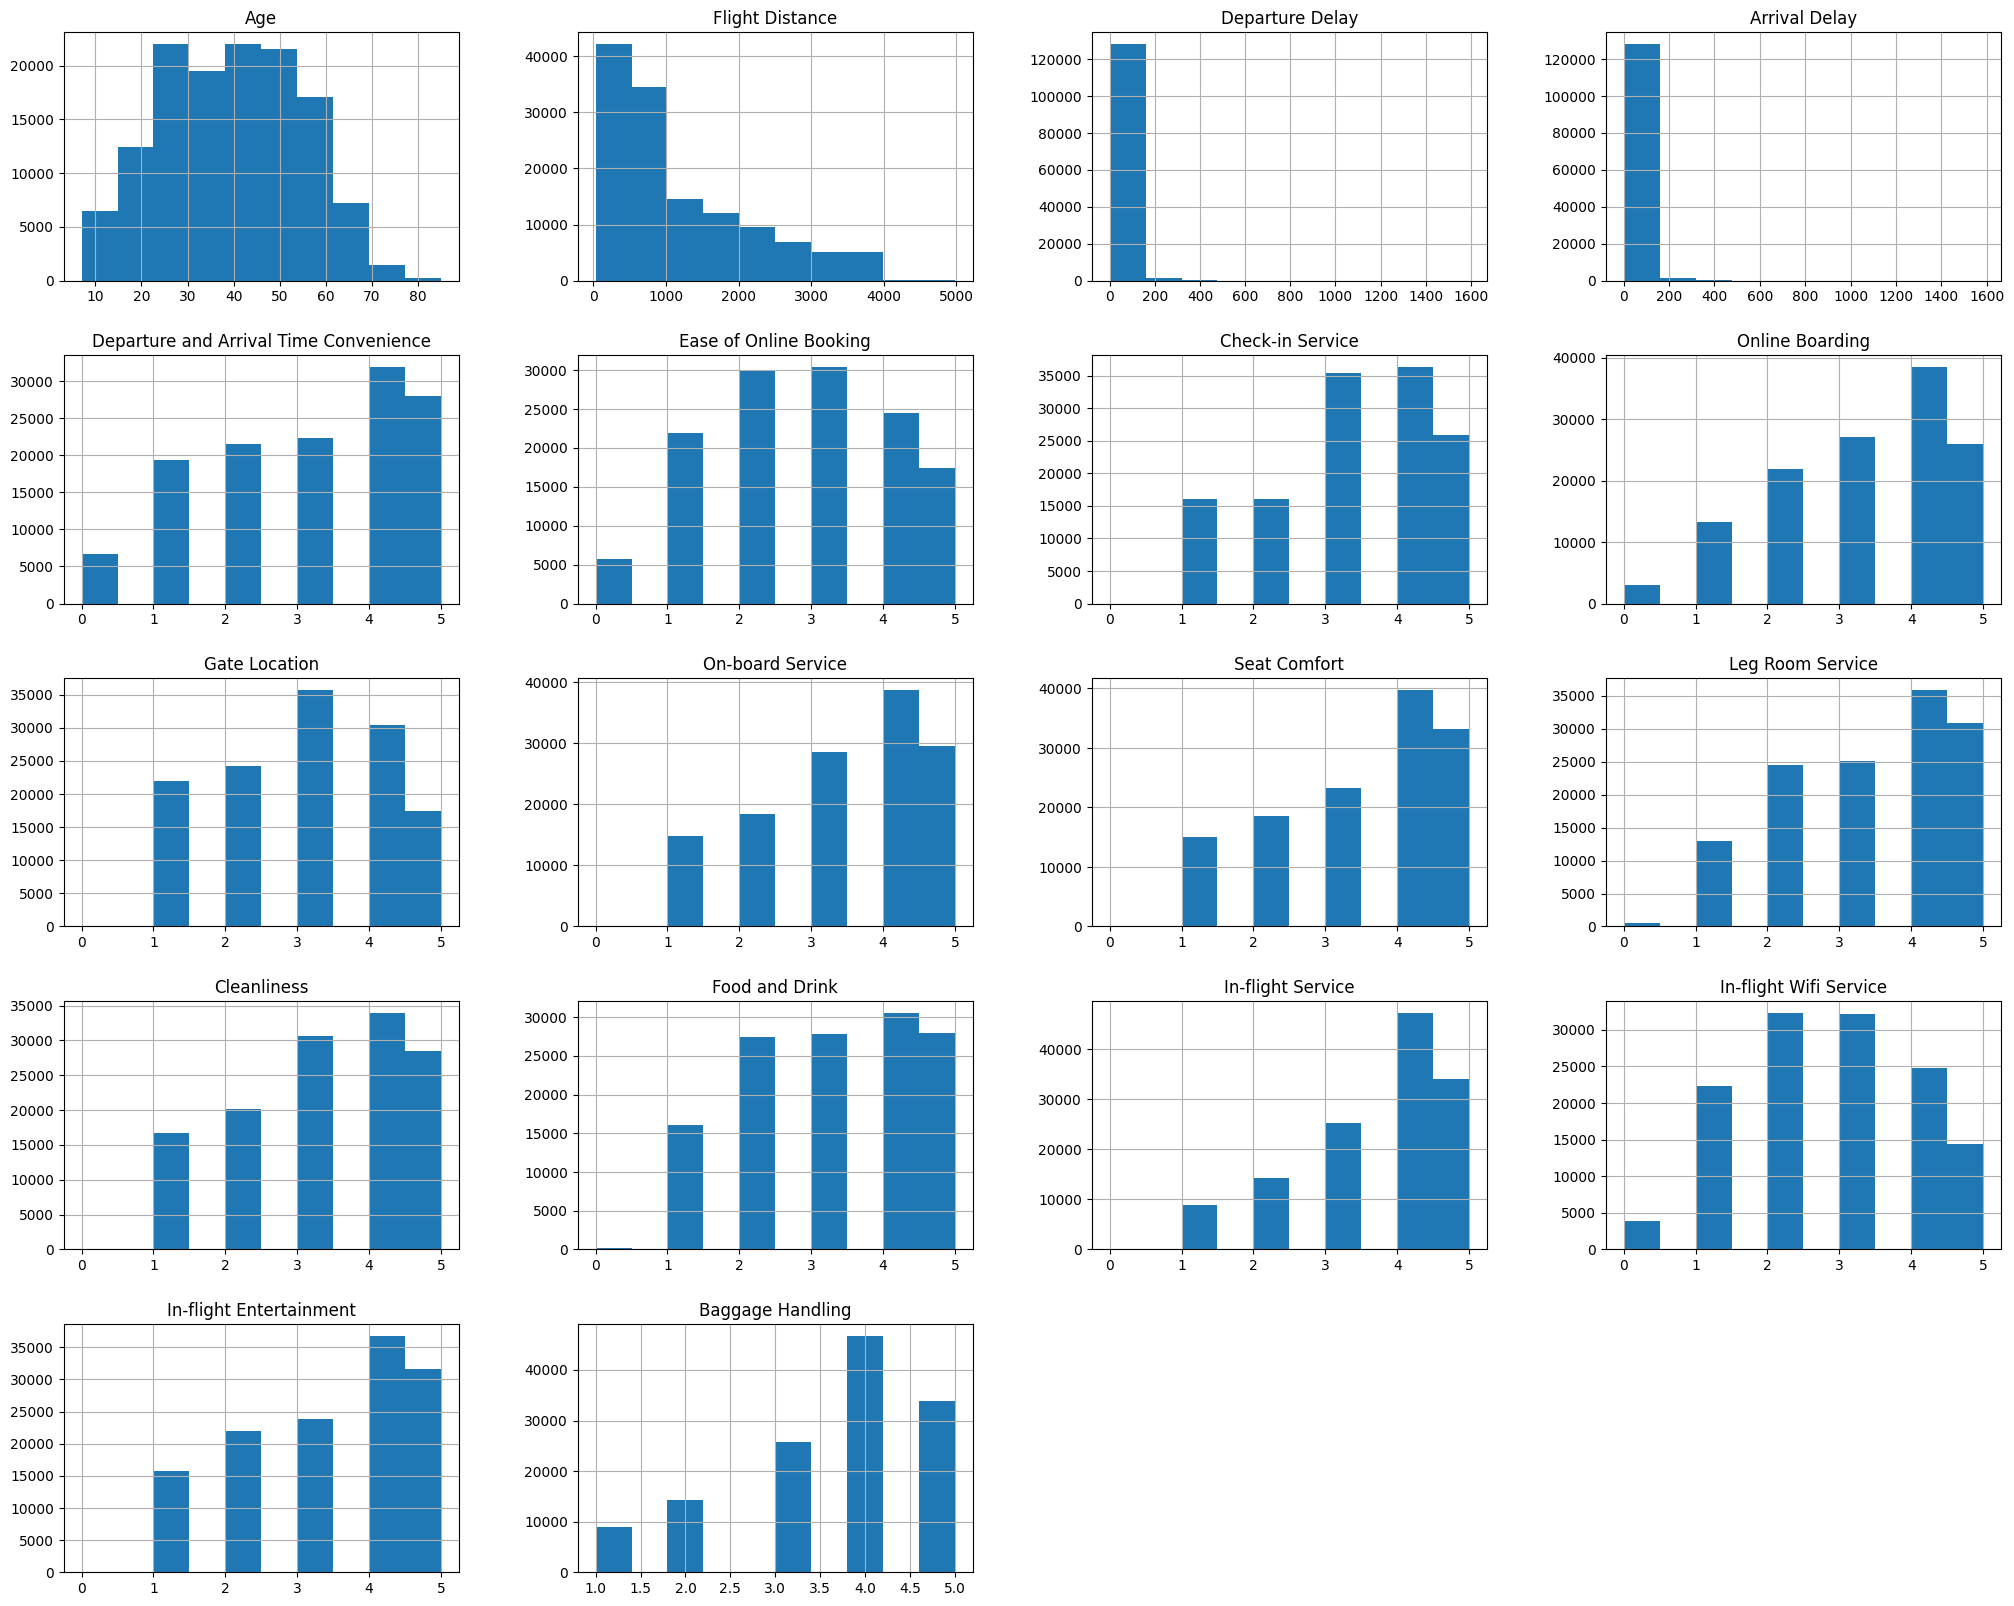

In [16]:
df.hist(bins=10, figsize=(25, 20))

We could see that the data is skewed for eg, deaparture delay and arrival delay.

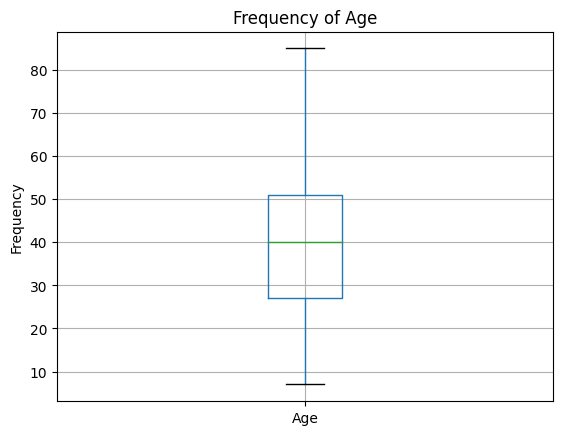

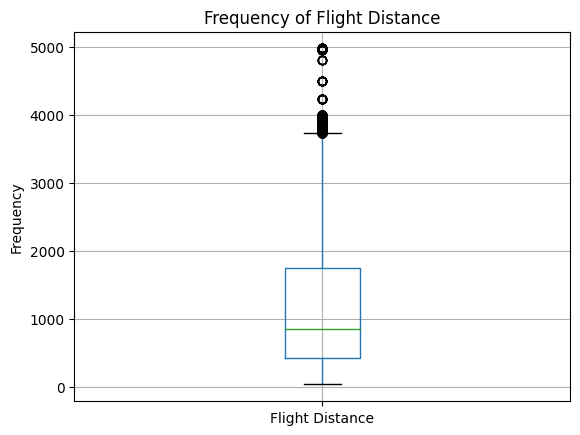

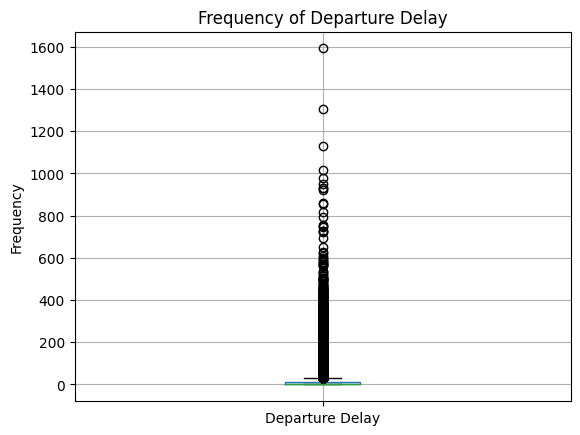

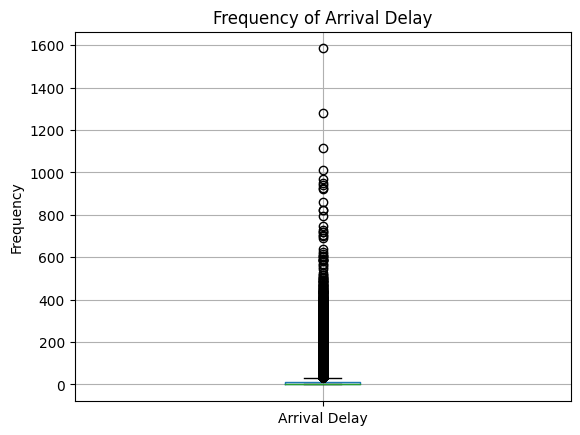

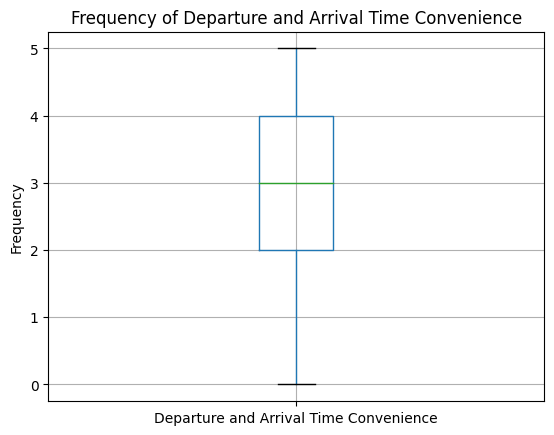

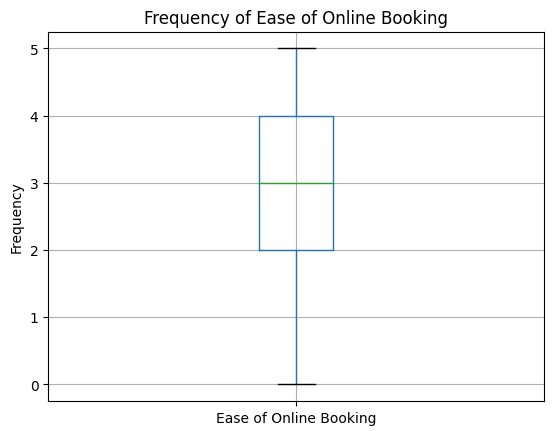

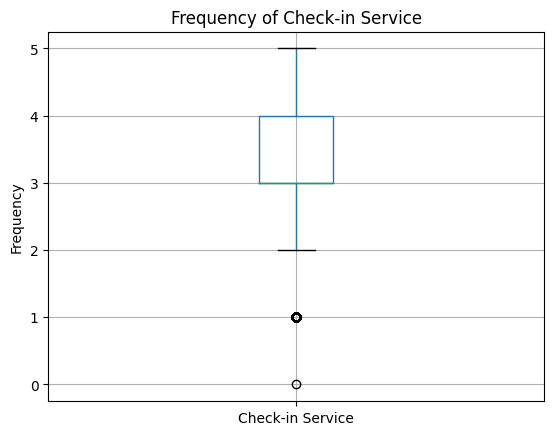

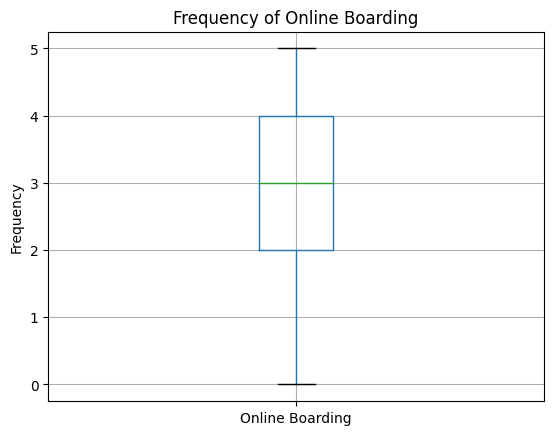

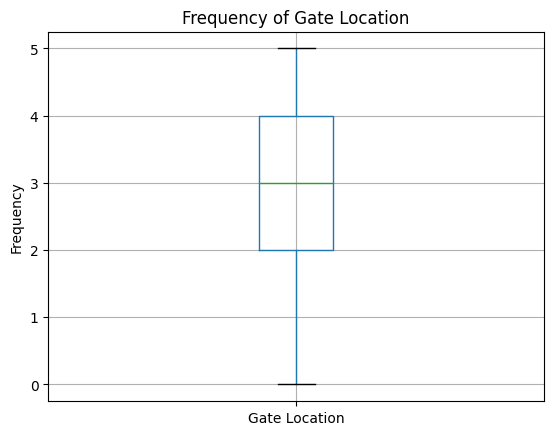

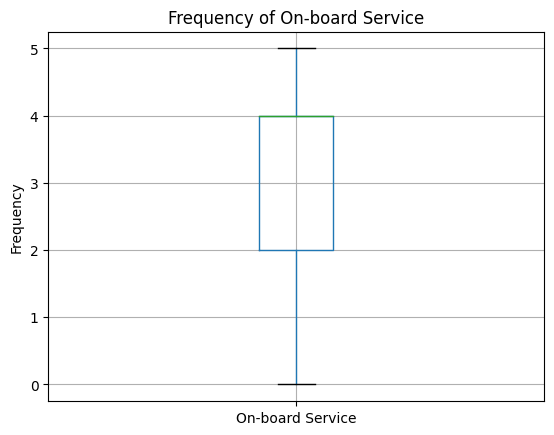

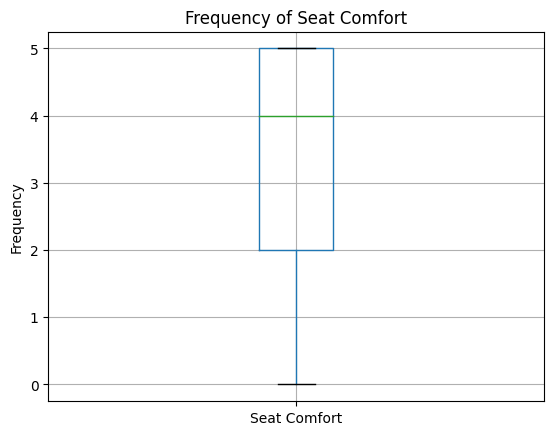

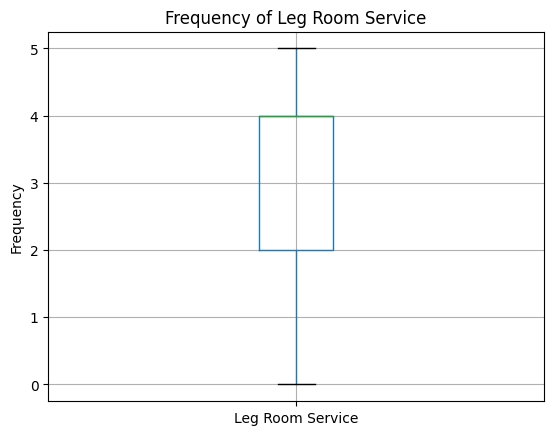

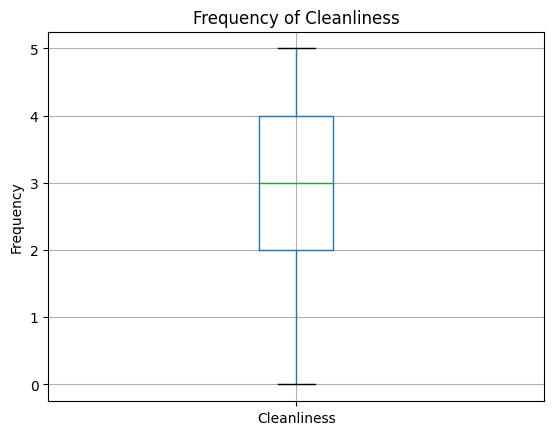

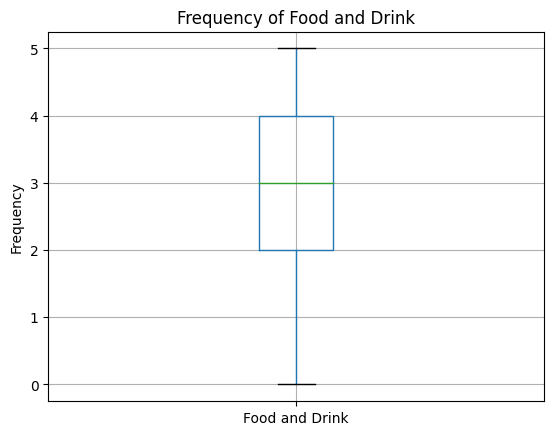

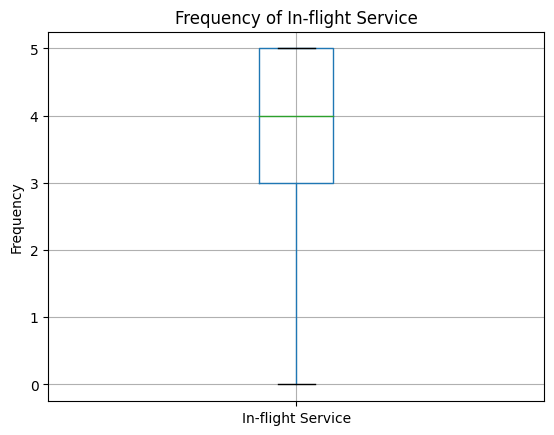

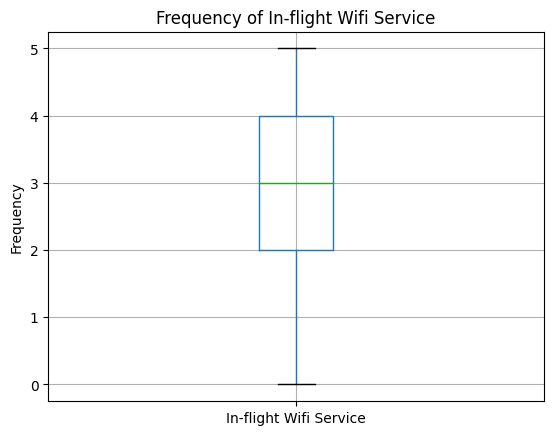

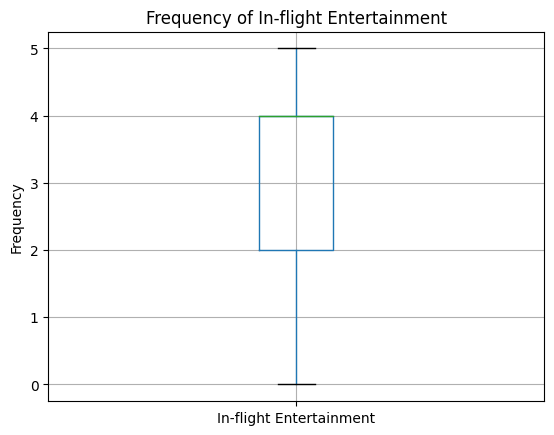

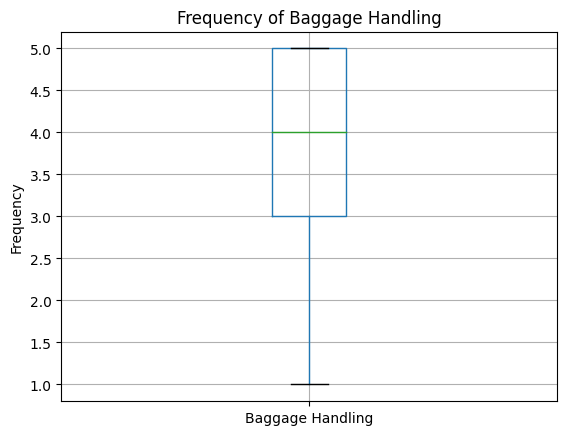

In [17]:
def plotboxplt(col):
    plt.ylabel("Frequency")
    plt.title(f"Frequency of {col}")
    df.boxplot(column=[col])
    plt.show()

num_df = df.select_dtypes(include='number')
columns = num_df.columns
for col in columns:
    plotboxplt(col)

There are outliers in data which are to be removed before using it for model fitting and evaluation.

HeatMap of correlation of overall data

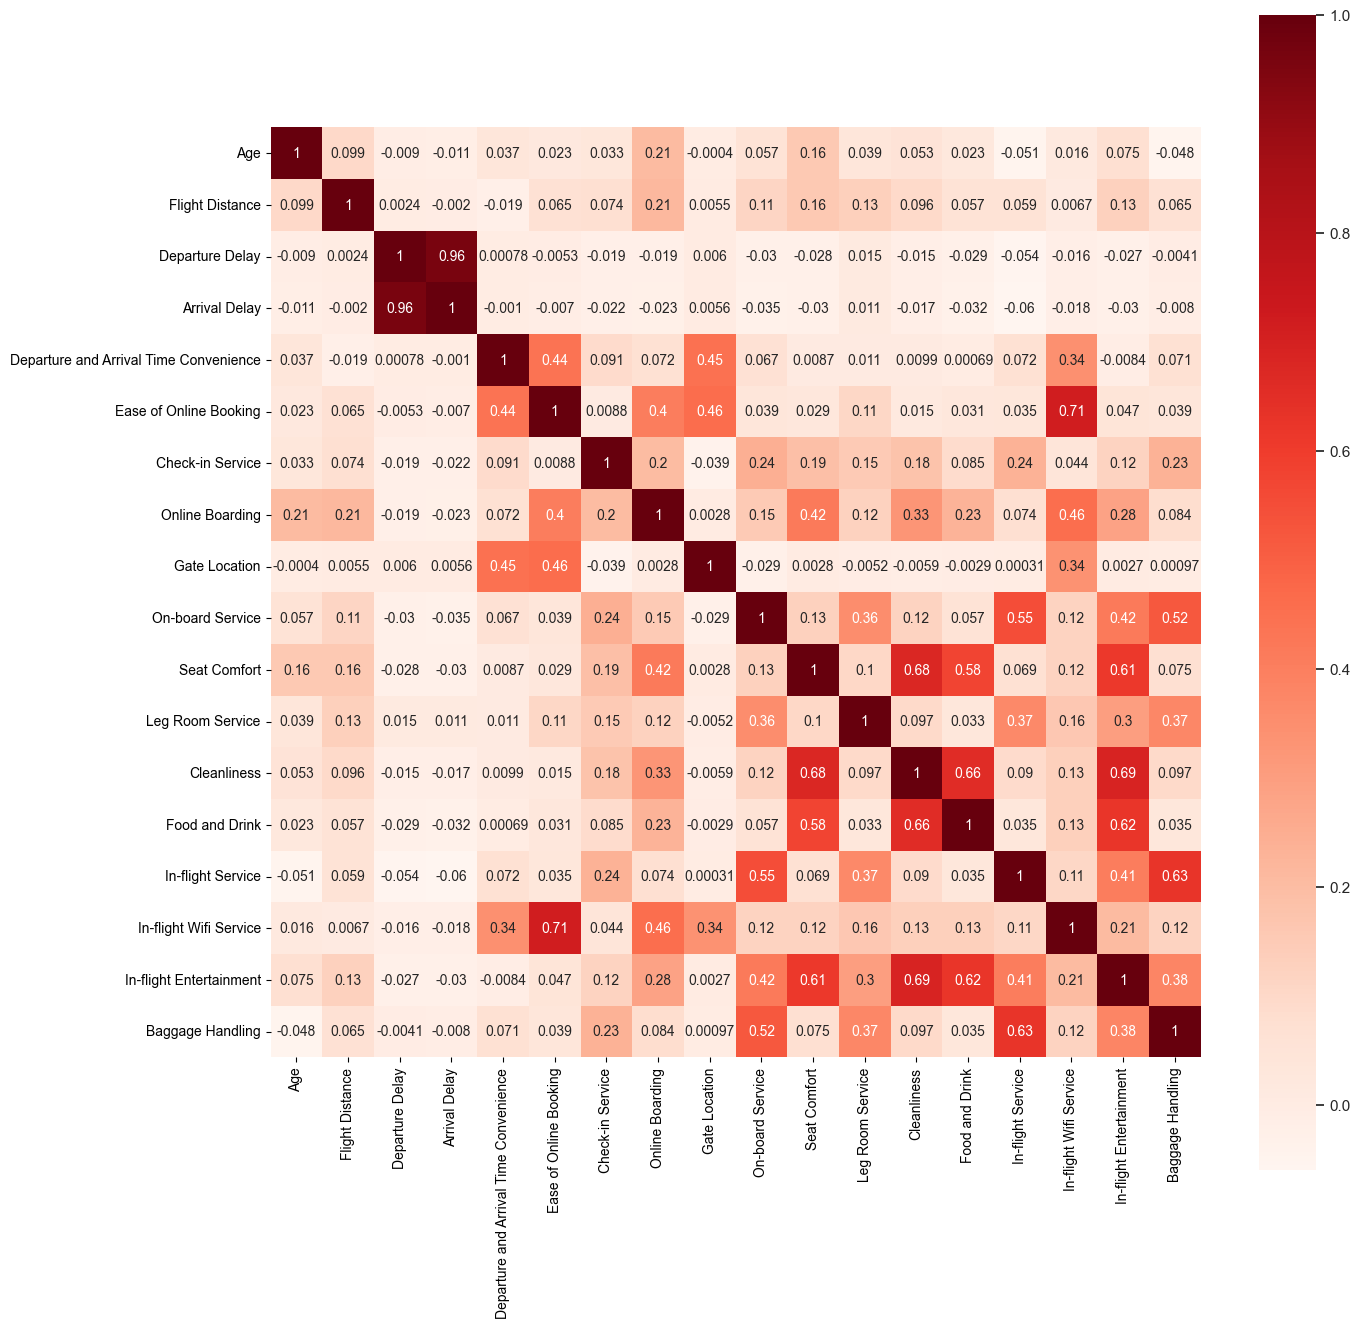

In [18]:
fig = plt.subplots (figsize = (15,15))
sns.set (font_scale = 1)
sns.heatmap (num_df.corr (), square = True, cbar = True, annot = True, annot_kws = {'size': 10},cmap=plt.cm.Reds)
plt.show ()

From above data, we could see that features arrival delay and departure delay are highly co-related.

In [19]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
df['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [21]:
df['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

In [22]:
df['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [23]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [24]:
df.describe()

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.045465,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.416353,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [25]:
df.Satisfaction.value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

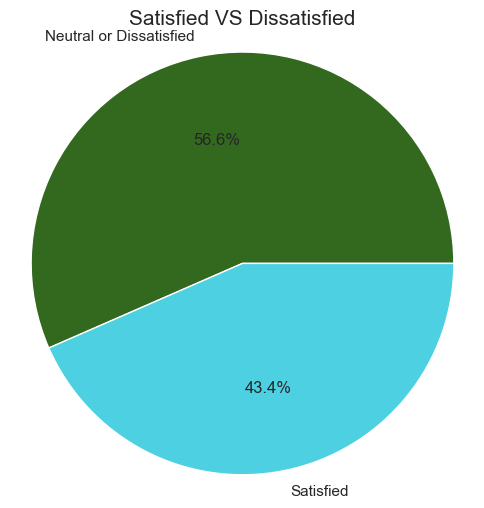

In [26]:
label = df.Satisfaction.value_counts().index
size = df.Satisfaction.value_counts()
plt.figure(figsize = (6,6))
plt.pie(size, labels=label,autopct='%1.1f%%', startangle=0,colors=['#33691e','#4dd0e1'])
plt.title('Satisfied VS Dissatisfied',fontsize=15);
plt.axis('equal')
plt.show()


Relationship of customer type with Departure and Arrival Time Convenience

In [27]:
df['Departure and Arrival Time Convenience'].value_counts()

4    31880
5    27998
3    22378
2    21534
1    19409
0     6681
Name: Departure and Arrival Time Convenience, dtype: int64

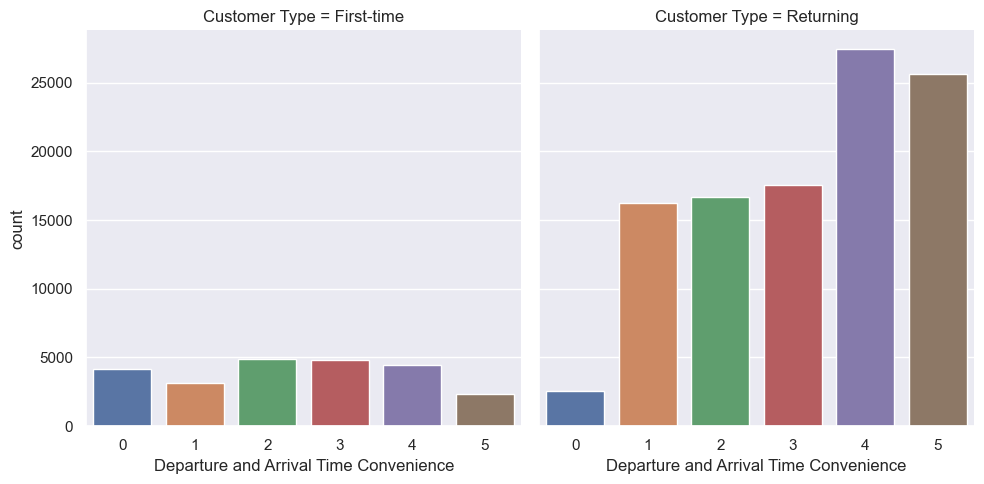

In [28]:
sns.catplot(kind='count',data=df,x='Departure and Arrival Time Convenience',col='Customer Type')

We see that the people who travel frequently, most of them are happy about the arrival and departure dates, as for the first time people, the largest percentage ranges from 2 to 4

The relationship of the satisfaction with the ease of booking online

In [29]:
df['Ease of Online Booking'].value_counts()

3    30393
2    30051
4    24444
1    21886
5    17424
0     5682
Name: Ease of Online Booking, dtype: int64

Text(0.5, 1.0, 'Ease of Online Booking Vs Satisfaction')

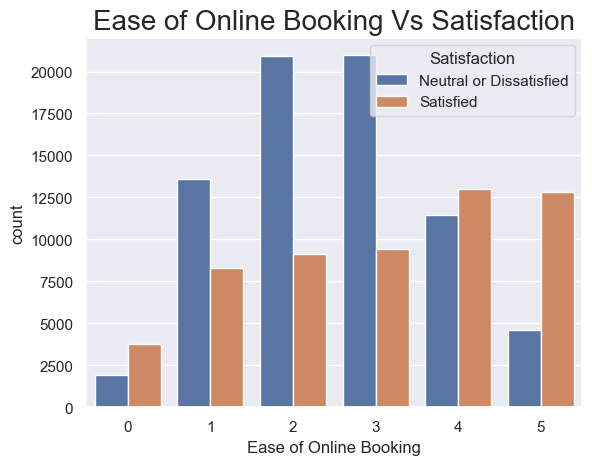

In [30]:
sns.countplot(x='Ease of Online Booking',data=df,hue='Satisfaction')
plt.title(label='Ease of Online Booking Vs Satisfaction',fontsize=20)

It was found that the most satisfied people are happy with the online reservation and the largest percentage of the people are satisfied with the reservation average

Satisfaction relationship with on-board service

In [31]:
df['On-board Service'].value_counts()

4    38703
5    29492
3    28542
2    18351
1    14787
0        5
Name: On-board Service, dtype: int64

Text(0.5, 1.0, 'On-board Service Vs Satisfaction')

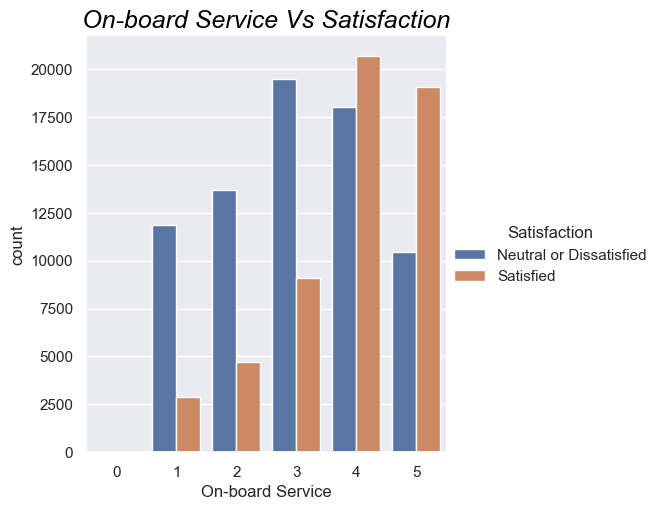

In [32]:
sns.catplot(kind='count',data=df,x='On-board Service',hue='Satisfaction')
plt.title(label='On-board Service Vs Satisfaction',fontsize=18,color='black',fontstyle='italic')

There is a large percentage of people who are satisfied category happy with the service as well as  people in dissatisfied or neutral category seems to be variable.

Satisfaction relationship with seat comfort

In [33]:
df['Seat Comfort'].value_counts()

4    39756
5    33158
3    23328
2    18529
1    15108
0        1
Name: Seat Comfort, dtype: int64

Text(0.5, 1.0, 'Seat Comfort Vs Satisfaction')

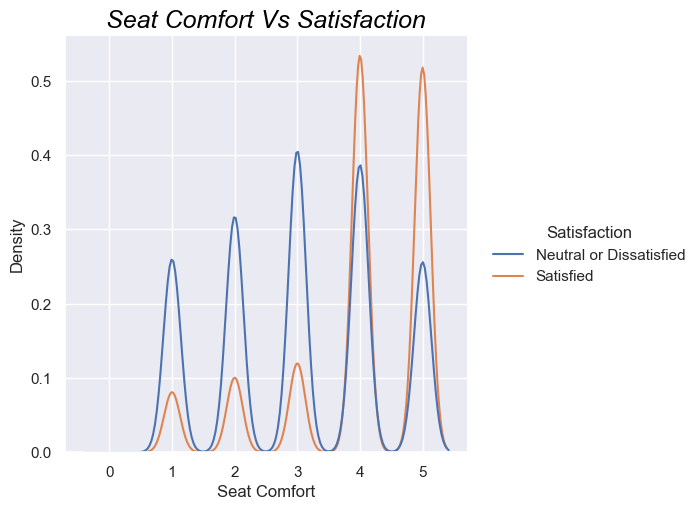

In [34]:
sns.displot(df, x="Seat Comfort", hue="Satisfaction",weights=5,kind='kde')
plt.title(label='Seat Comfort Vs Satisfaction',fontsize=18,color='black',fontstyle='italic')


In [35]:
df2 = df.groupby(['Satisfaction', 'Seat Comfort']).agg({'Seat Comfort': 'sum'})
df3 = df2.groupby(level=0,group_keys=False).apply(lambda x:100 * x / float(x.sum()))
print(df3)

                                      Seat Comfort
Satisfaction            Seat Comfort              
Neutral or Dissatisfied 0                 0.000000
                        1                 5.258417
                        2                12.853411
                        3                24.648326
                        4                31.335398
                        5                25.904449
Satisfied               1                 1.507482
                        2                 3.742343
                        3                 6.693862
                        4                39.809308
                        5                48.247005


Most of the people think that the seats are comfortable. Like the rest of the previous comparisons, a good number of dissatisfied people are happy with the seats, so the problem is not here

The relationship of the satisfaction with cleanliness

In [36]:
df['Cleanliness'].value_counts()

4    33969
3    30639
5    28416
2    20113
1    16729
0       14
Name: Cleanliness, dtype: int64

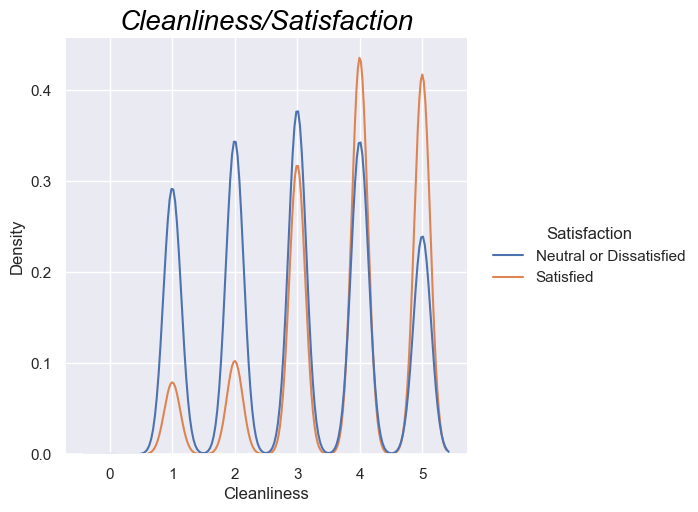

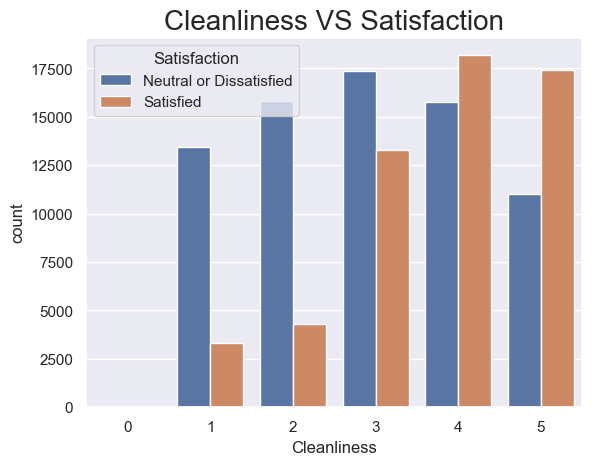

In [37]:
sns.displot(df,x='Cleanliness',hue='Satisfaction',kind='kde')
plt.title(label='Cleanliness/Satisfaction',fontsize=20,color='black',fontstyle='italic')
plt.show()
sns.countplot(x='Cleanliness', hue="Satisfaction", data=df).set_title('Cleanliness VS Satisfaction', fontsize=20);


In [38]:
df2 = df.groupby(['Satisfaction', 'Cleanliness']).agg({'Cleanliness': 'sum'})
df3 = df2.groupby(level=0,group_keys=False).apply(lambda x:100 * x / float(x.sum()))
print(df3)

                                     Cleanliness
Satisfaction            Cleanliness             
Neutral or Dissatisfied 0               0.000000
                        1               6.236190
                        2              14.702442
                        3              24.189955
                        4              29.312042
                        5              25.559372
Satisfied               1               1.558598
                        2               4.046204
                        3              18.829467
                        4              34.403618
                        5              41.162113


Around 41% of satisfied people and around 25% of Neutral or Dissatisfied are happy with highest amount cleanliness(5).

The relationship of the satisfaction with in-flight service

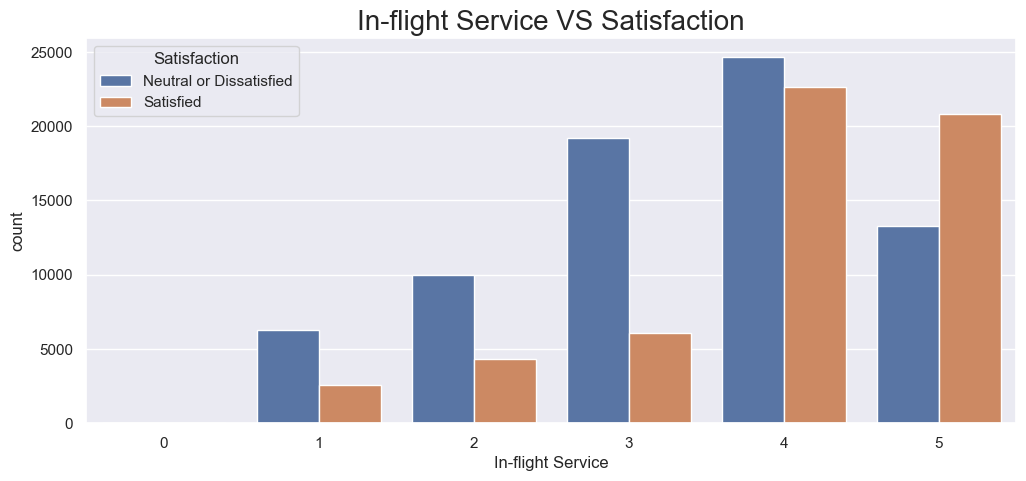

In [39]:
plt.figure(figsize=(12,5))
sns.countplot(x='In-flight Service', hue="Satisfaction", data=df).set_title('In-flight Service VS Satisfaction', fontsize=20);


From the above graph, it is  observed that most people who are satisfied or are neutral & dissatisfied are happy with In-flight Service. 

The relationship of the satisfaction with in-flight wifi service

In [40]:
df['In-flight Wifi Service'].value_counts()

2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: In-flight Wifi Service, dtype: int64

Text(0.5, 1.0, 'In-flight Wifi Service/Satisfaction')

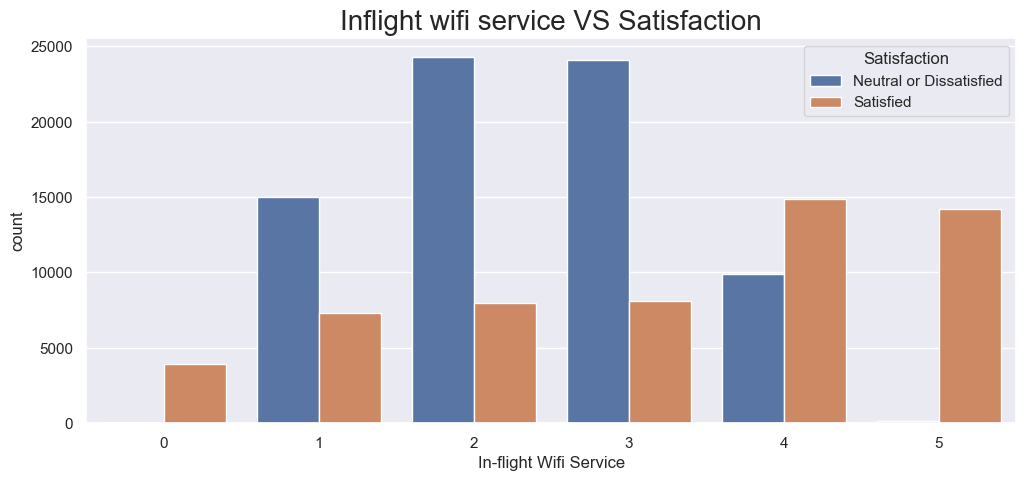

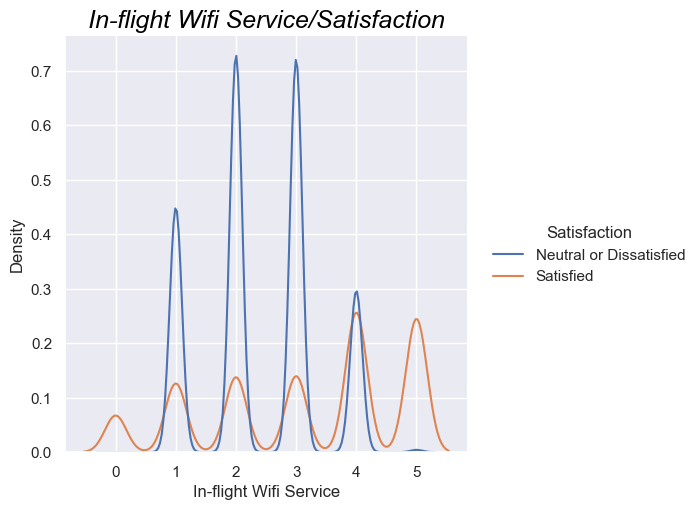

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(x='In-flight Wifi Service', hue="Satisfaction", data=df).set_title('Inflight wifi service VS Satisfaction', fontsize=20);

sns.displot(df,x='In-flight Wifi Service',hue='Satisfaction',kind='kde')
plt.title(label='In-flight Wifi Service/Satisfaction',fontsize=18,color='black',fontstyle='italic')

In [42]:
df1 = df.groupby(['Satisfaction','In-flight Wifi Service']).count()/df['Satisfaction'].count()*100
df1.style.background_gradient()

It is observed from above data that most of the people are not happy with the In-flight Wifi Service especially people who are neutral or dissatisfied around 45%.

The relationship of the satisfaction with in-flight entertainment

In [43]:
df['In-flight Entertainment'].value_counts()

4    36791
5    31544
3    23884
2    21968
1    15675
0       18
Name: In-flight Entertainment, dtype: int64

<Figure size 2500x1500 with 0 Axes>

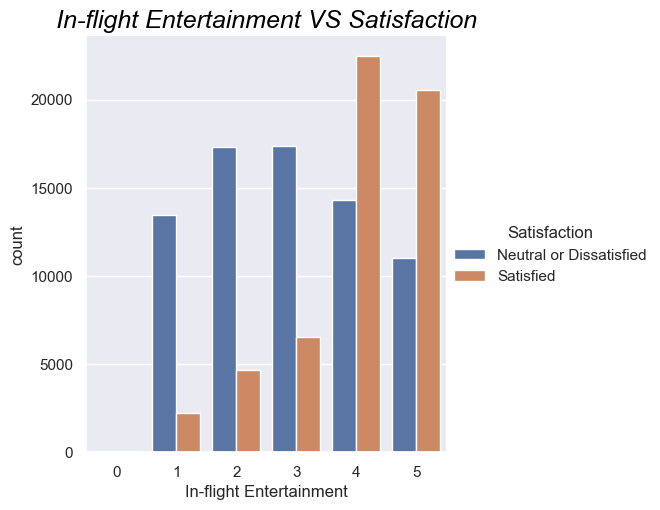

<Figure size 2500x1500 with 0 Axes>

In [44]:
sns.catplot(kind='count',data=df,x='In-flight Entertainment',hue='Satisfaction')
plt.title(label='In-flight Entertainment VS Satisfaction',fontsize=18,color='black',fontstyle='italic')
plt.figure(figsize=(25,15))

Most of satisfied people who viewed the entertainment are happy whereas most of the people who unsatisfied are mostly unhappy. Hence, it could be one of the factor for people to be satisfied or unsatisfied.

Relationship between satisfaction & online-boarding

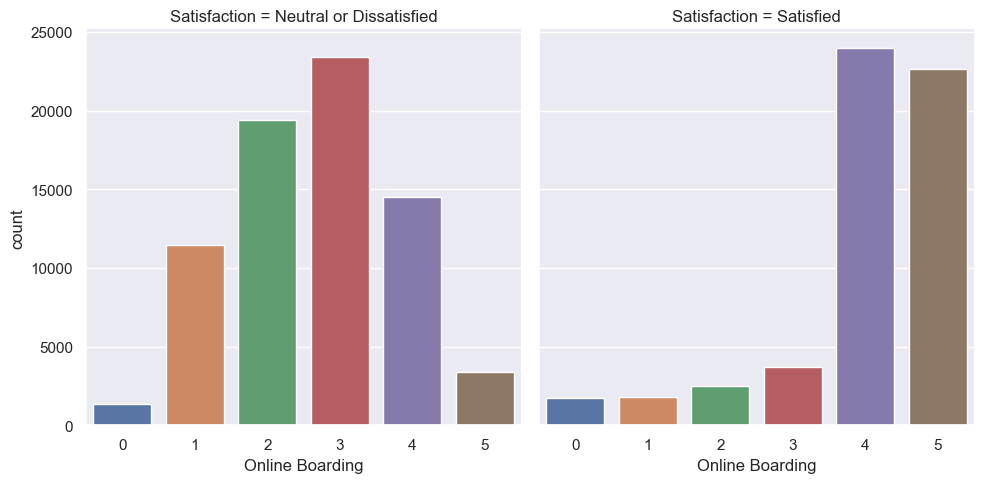

In [45]:
sns.catplot(kind='count',data=df,x='Online Boarding',col='Satisfaction')

Most of satisfied people who used online-boarding are happy whereas most of the people who unsatisfied are mostly neutral(3) or inclined to unhappy. Hence, it could be one of the factor for people to be satisfied or unsatisfied.

Relationship between Class & Satisfaction

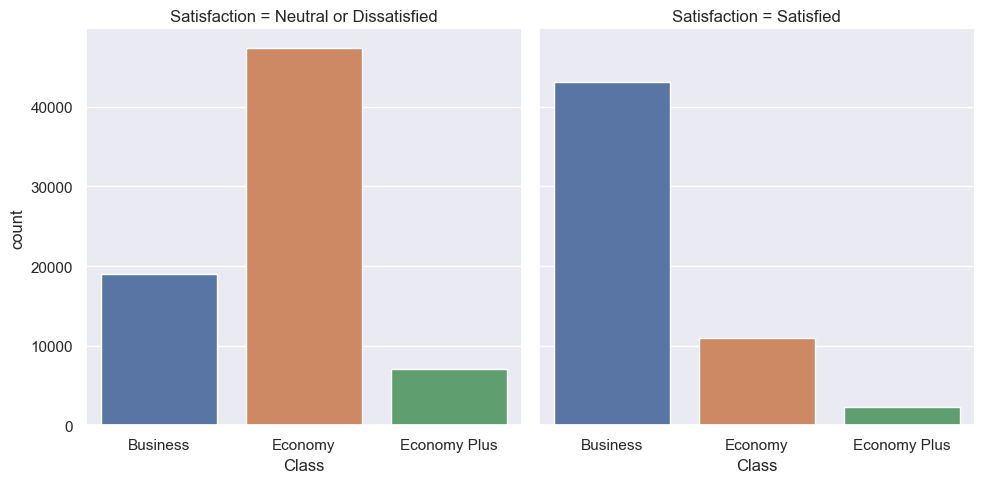

In [46]:
sns.catplot(kind='count',data=df,x='Class',col='Satisfaction')

In general people travelling in business class are more happy compared to other classes and people travelling in Economy plus class are least happy 

Relation between type of travel & satisfaction

People mostly travelling are with business purpose than with personal type of travel.

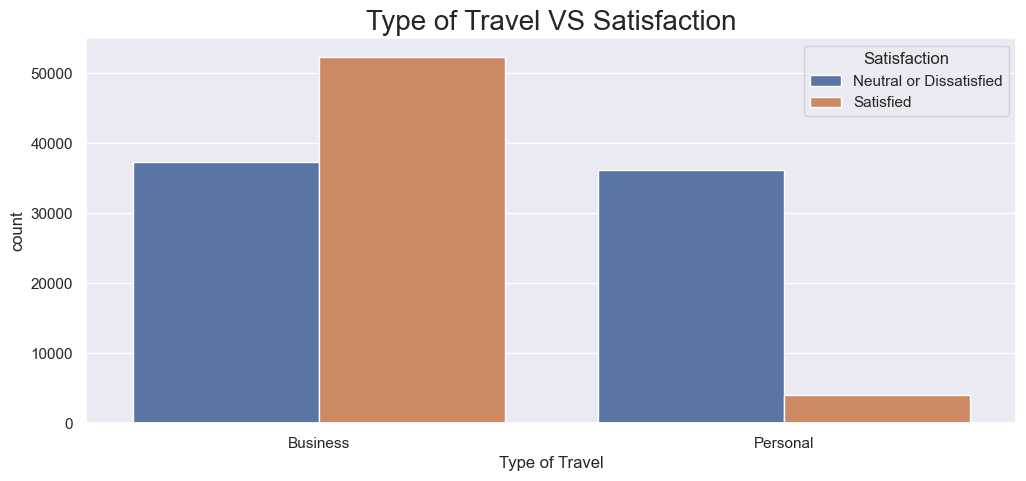

In [47]:
plt.figure(figsize=(12,5))
sns.countplot(x="Type of Travel", hue="Satisfaction", data=df).set_title('Type of Travel VS Satisfaction', fontsize=20);

Flight Distance

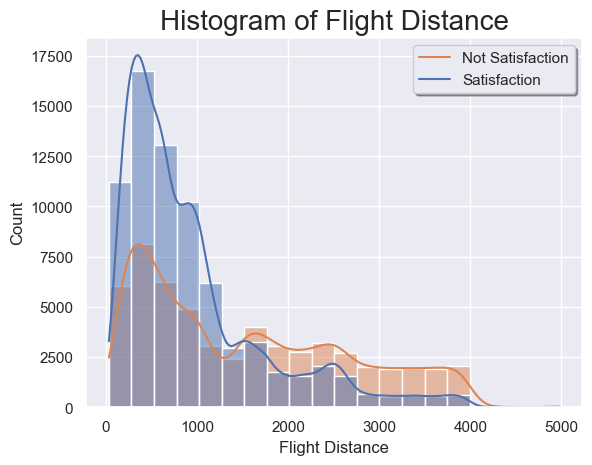

In [48]:
sns.histplot(x='Flight Distance', data = df, bins = 20, hue ='Satisfaction', kde = True).set_title('Histogram of Flight Distance',fontsize=20)
plt.legend(['Not Satisfaction','Satisfaction'],shadow = True, loc = 0);


In this chart where we check all customers, you can see that a large proportion of the flights are in the range of 0-1250 (distance). Twice or more clients, depending on the specific distance, are neutral or dissatisfied. Most of them are in the range of 250 - 750.

<AxesSubplot: xlabel='Satisfaction', ylabel='Arrival Delay'>

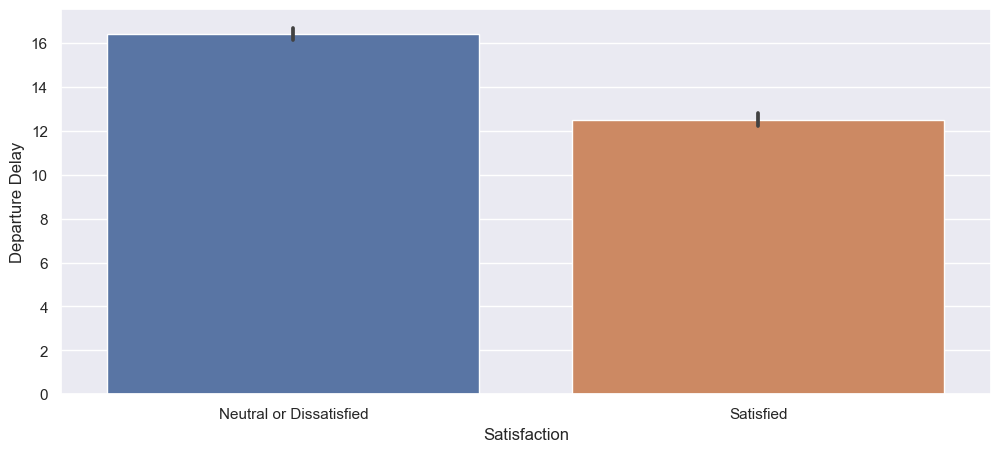

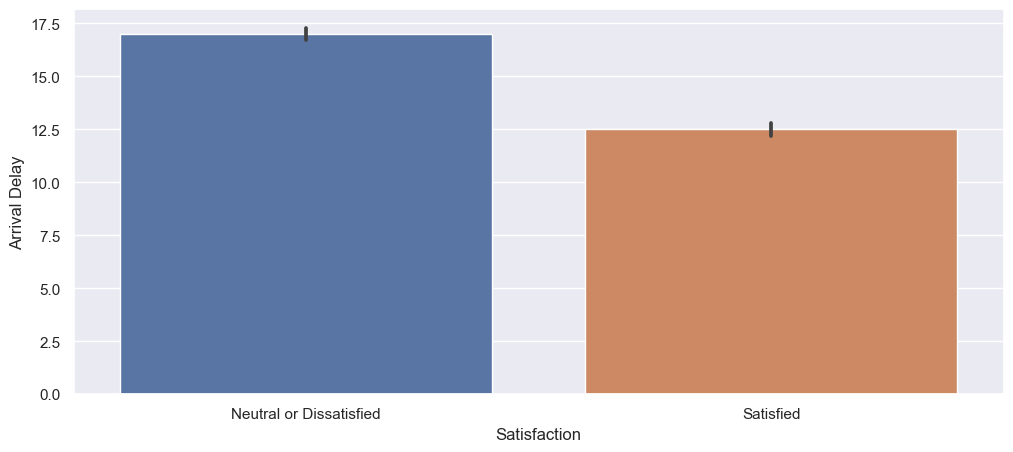

In [49]:
plt.figure(figsize=(12,5))
sns.barplot(x='Satisfaction', y='Departure Delay', data=df)
plt.figure(figsize=(12,5))
sns.barplot(x='Satisfaction', y='Arrival Delay', data=df)

People are unhappy when there is delay in departure or arrival.

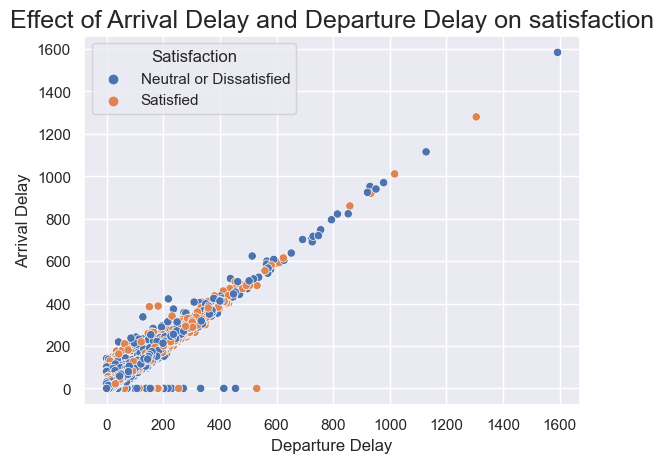

In [50]:
sns.scatterplot(data=df, x="Departure Delay", y="Arrival Delay", hue=df['Satisfaction']).set_title('Effect of Arrival Delay and Departure Delay on satisfaction', fontsize=18);


The effect of Arrival Delay and Departure Delay on satisfaction is almost linear

Relationship between Leg Room Service and Class

<AxesSubplot: xlabel='Class', ylabel='Leg Room Service'>

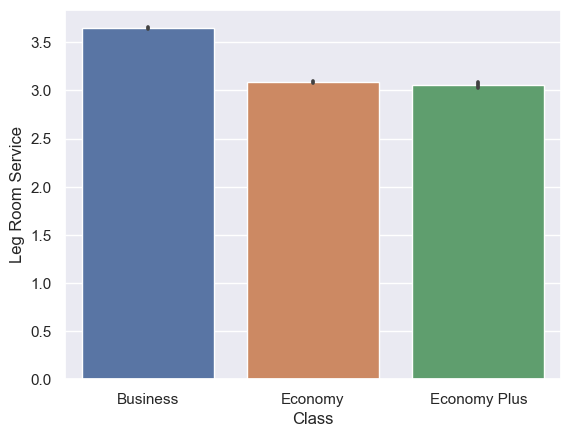

In [51]:
sns.barplot(x='Class',y='Leg Room Service',data=df)

We can see here that the businesss class probably have more leg space as the average of business class rating in this service is slightly higher

Relationship between Baggage Handling Service and Class and Relationship between Baggage Handling Service and Satisfaction 

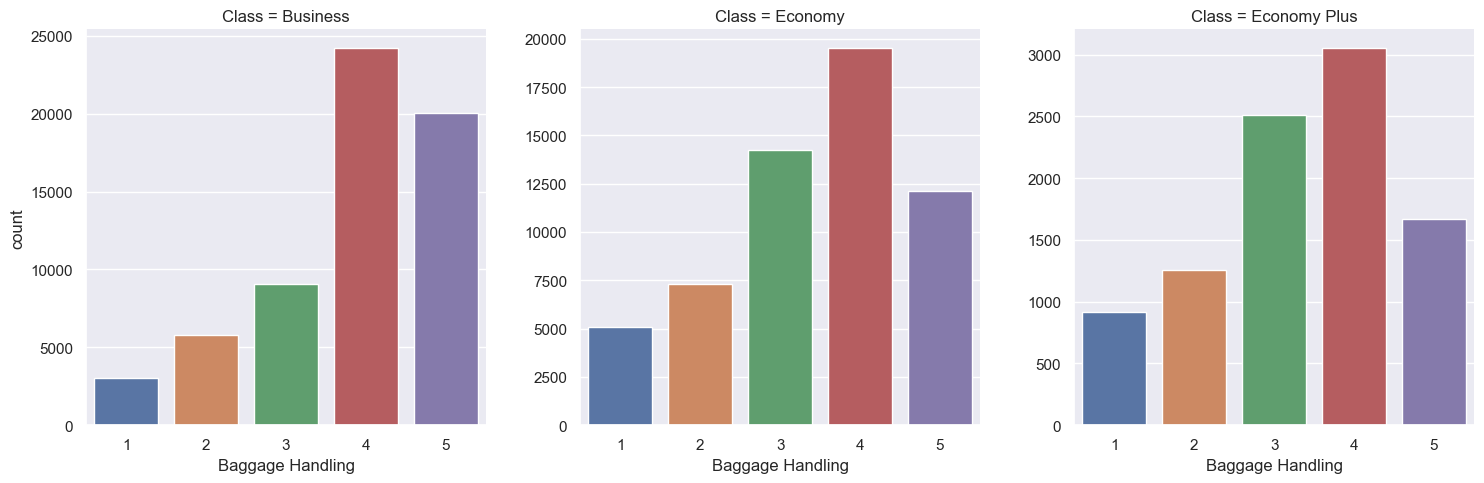

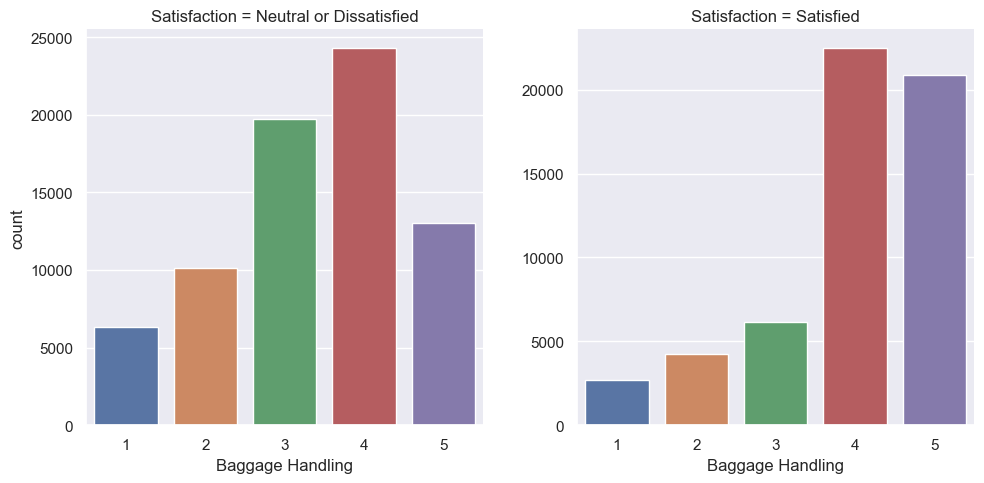

In [52]:
sns.catplot(x='Baggage Handling',data=df,kind='count',col='Class',sharey=False)
sns.catplot(x='Baggage Handling',data=df,kind='count',col='Satisfaction',sharey=False)

Looks like most of the people are pleased with this service irrespective of class

Relationship between Customer Type and Class and Relationship between Customer Type and Satisfaction 

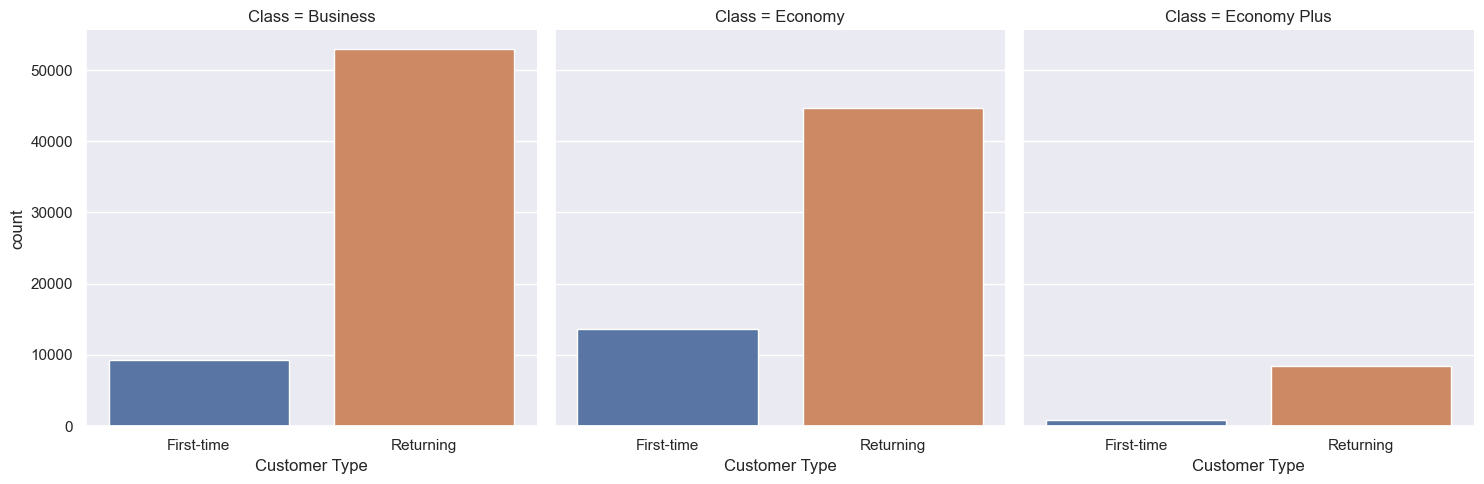

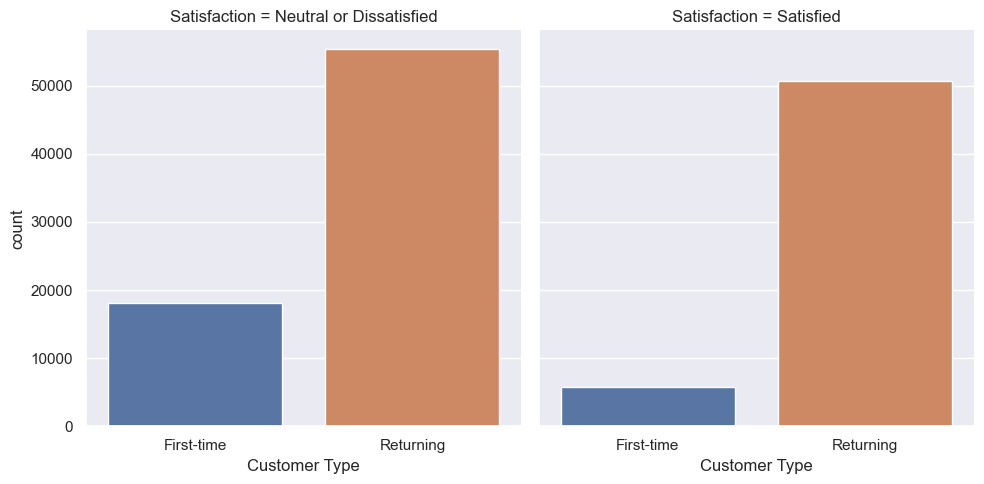

In [53]:
sns.catplot(x='Customer Type',data=df,kind='count',col='Class')
sns.catplot(x='Customer Type',data=df,kind='count',col='Satisfaction')

We can see here that the returning passengers are  larger than the first-time passengers especially in business class following by economy class.

Remove the outlier datapoints from the dataset.

In [54]:
def remove_outliers(columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1    #IQR is interquartile range. 

    filter = (df[columns] >= Q1 - 1.5 * IQR) & (df[columns] <= Q3 + 1.5 *IQR)
    return df.loc[filter] 
    

    
showfliers=False
for col in columns:
    df = remove_outliers(col)

In [55]:
df.shape

(74621, 23)

Encoding data

In [56]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Customer Type'] = labelencoder.fit_transform(df['Customer Type'])
df['Type of Travel'] = labelencoder.fit_transform(df['Type of Travel'])
df['Class'] = labelencoder.fit_transform(df['Class'])
df['Satisfaction'] = labelencoder.fit_transform(df['Satisfaction'])


In [57]:
print(df[['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction']].head(5))

   Gender  Customer Type  Type of Travel  Class  Satisfaction
0       1              0               0      0             0
2       1              1               0      0             1
3       1              1               0      0             1
4       0              1               0      0             1
6       1              1               0      0             1


In [58]:
df['Class'].unique()

array([0, 1, 2])

In [59]:
df.shape

(74621, 23)

Important feature in dataset

In [60]:
X = df.loc[:,df.columns!='Satisfaction']
y = df[['Satisfaction']]

Scaler Data

In [61]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
numerical = ['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']
# Input features

X = df.loc[:,['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling']]
X[numerical] = ss.fit_transform(X[numerical])



# Output target
y = df['Satisfaction']


HeatMap to show correlation with of features with 'Satisfaction'

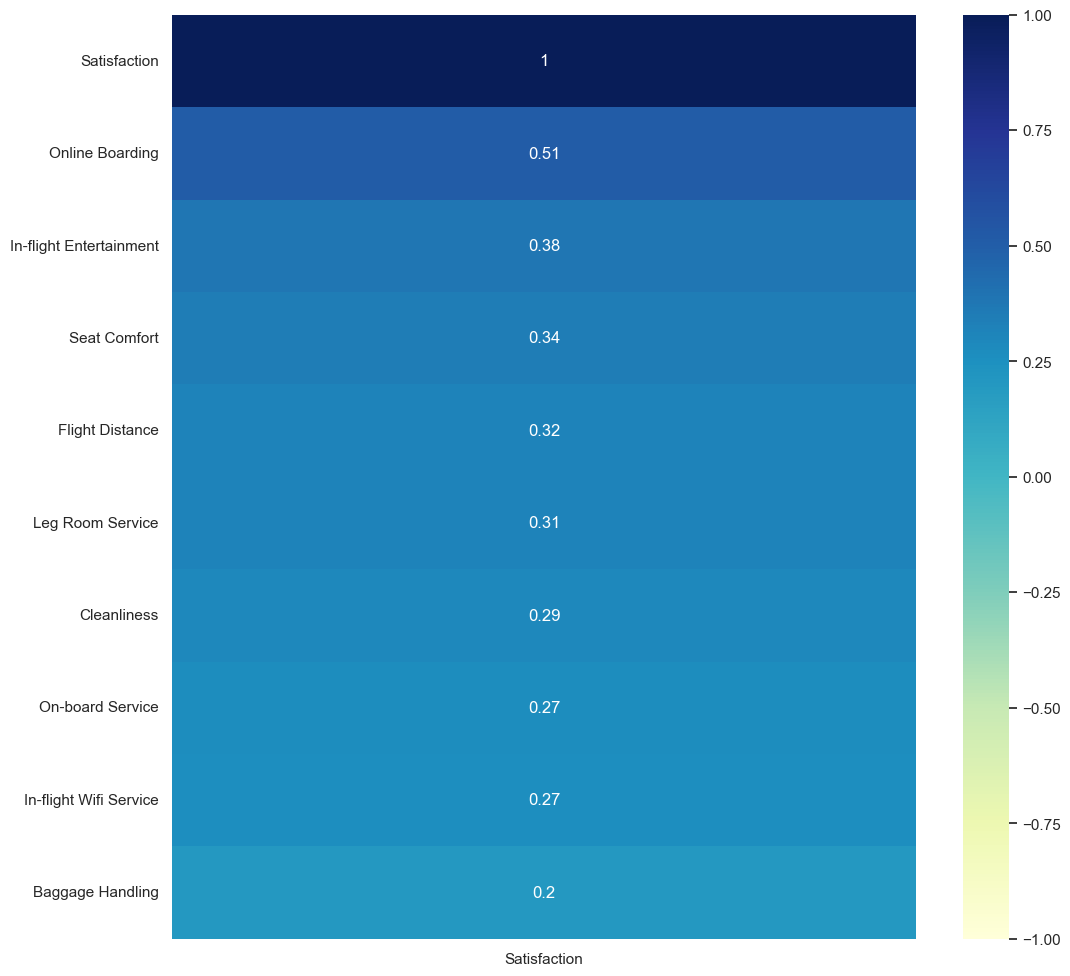

In [62]:
fig, ax = plt.subplots(figsize = (12,12))
sns.heatmap(df.corr()[['Satisfaction']].sort_values('Satisfaction').tail(10),vmax=1,vmin=-1,cmap = 'YlGnBu',annot = True, ax =ax);
ax.invert_yaxis()

Split data

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, shuffle = True, random_state = 42)

Building model and evaluating them.

Using Knn Classifier

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

mymodelknm = KNeighborsClassifier()

mymodelknm.fit(X_train , y_train)
knn_train_score=mymodelknm.score(X_train , y_train)
knn_test_score=mymodelknm.score(X_test , y_test)
knny_pred = mymodelknm.predict(X_test)
print(knn_test_score)

0.9216750418760469


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knny_pred))
print('accuracy',accuracy_score(y_test, knny_pred))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      7369
           1       0.95      0.89      0.92      7556

    accuracy                           0.92     14925
   macro avg       0.92      0.92      0.92     14925
weighted avg       0.92      0.92      0.92     14925

accuracy 0.9216750418760469


Using Decision Tree Classifier

In [66]:
from sklearn.tree  import DecisionTreeClassifier

mymodeldt = DecisionTreeClassifier()

mymodeldt.fit(X_train , y_train)
dt_train_score=mymodeldt.score(X_train , y_train)
dt_test_score=mymodeldt.score(X_test , y_test)
dty_pred = mymodeldt.predict(X_test)
print(dt_test_score)

0.9449246231155779


In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dty_pred))
print('accuracy',accuracy_score(y_test, dty_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7369
           1       0.95      0.94      0.95      7556

    accuracy                           0.94     14925
   macro avg       0.94      0.94      0.94     14925
weighted avg       0.94      0.94      0.94     14925

accuracy 0.9449246231155779


Using Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

mymodelrf = RandomForestClassifier()

mymodelrf.fit(X_train , y_train)
rfc_train_score=mymodelrf.score(X_train , y_train)
rfc_test_score=mymodelrf.score(X_test , y_test)
rfcy_pred = mymodelrf.predict(X_test)
print(rfc_test_score)

0.9561139028475711


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfcy_pred))
print('accuracy',accuracy_score(y_test, rfcy_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      7369
           1       0.97      0.94      0.96      7556

    accuracy                           0.96     14925
   macro avg       0.96      0.96      0.96     14925
weighted avg       0.96      0.96      0.96     14925

accuracy 0.9561139028475711


From the above models; it is seen that random forest classifier gives more accuracy and precision. Hence, moving forward with random forest classifier to check if its performance could be increased more.

Getting important features through RandomForestClassifier

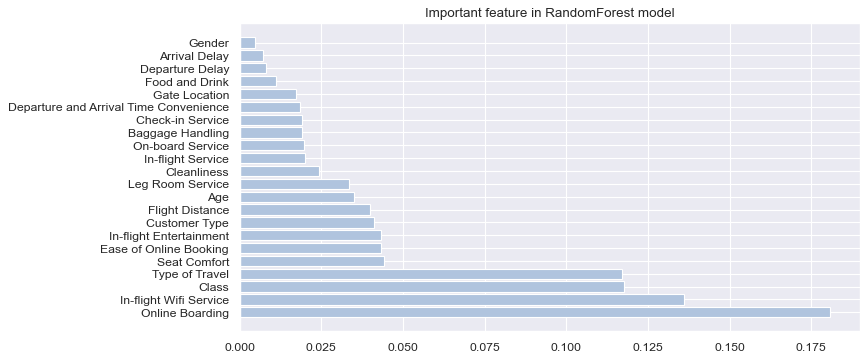

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
model = RandomForestClassifier(n_estimators=100, bootstrap = True,max_features = 'sqrt')

model.fit(X_train, y_train)

fi = pd.DataFrame({'feature': list(X_train),'importance': 
model.feature_importances_}).sort_values('importance', ascending = False)
plt.figure(figsize=(10, 5), dpi=80)
plt.title('Important feature in RandomForest model')
plt.barh(fi['feature'],fi['importance'],color=['lightsteelblue']);


Using Recursive Feature Elimination to get important features

In [71]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
cols = list(X_train.columns)
#Initializing RFE model
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=11)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  
#Fitting the data to model
model.fit(X_rfe,y_train)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Ease of Online Booking', 'Online Boarding', 'Seat Comfort',
       'Leg Room Service', 'In-flight Wifi Service',
       'In-flight Entertainment'],
      dtype='object')


From abive it is clear that - 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Ease of Online Booking', 'Online Boarding', 'Seat Comfort', 'Leg Room Service', 'In-flight Wifi Service', 'In-flight Entertainment' are most important features in model. Hence, using thses features, building the model again to find out if the performance of model improves.

In [72]:
X_new_train = X_train.loc[:,['Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Ease of Online Booking', 'Online Boarding', 'Seat Comfort',
       'Leg Room Service', 'In-flight Wifi Service',
       'In-flight Entertainment']]
# Output target
y_new_train = y_train

X_new_test = X_test.loc[:,['Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Ease of Online Booking', 'Online Boarding', 'Seat Comfort',
       'Leg Room Service', 'In-flight Wifi Service',
       'In-flight Entertainment']]
# Output target
y_new_test = y_test


In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

mymodelrf1 = RandomForestClassifier()

mymodelrf1.fit(X_new_train , y_new_train)
rfc_train_score1=mymodelrf1.score(X_new_train , y_new_train)
rfc_test_score1=mymodelrf1.score(X_new_test , y_new_test)
rfcy_pred1 = mymodelrf1.predict(X_new_test)
print(rfc_test_score1)


0.944321608040201


In [74]:
print('accuracy',accuracy_score(y_new_test,rfcy_pred1))
print(classification_report(y_test,rfcy_pred1))

accuracy 0.944321608040201
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7369
           1       0.96      0.93      0.94      7556

    accuracy                           0.94     14925
   macro avg       0.94      0.94      0.94     14925
weighted avg       0.94      0.94      0.94     14925



From above it is clear that the model built with all features has better performance than using important features. Hence, for further processsing, using base model.

Using RandomizedSearchCV for tuning the hyperparameter of RandomForestClassifier to check if the perfromance improves after hyperparameter tuning.

In [75]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 288, 377, 466,
                                                         555, 644, 733, 822,
                                                         911, 1000]},
                   random_state=42, verbose=2)

In [76]:
rf_random.best_params_

{'n_estimators': 733,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

mymodelrf1 = RandomForestClassifier(max_depth = 80, max_features = 'sqrt', n_estimators = 733, min_samples_leaf =1,
                                    min_samples_split = 5,bootstrap = False)
mymodelrf1.fit(X_train , y_train)
rfc_train_score1=mymodelrf1.score(X_train , y_train)
rfc_test_score1=mymodelrf1.score(X_test , y_test)
rfcy_predh = mymodelrf1.predict(X_test)
print(rfc_test_score1)

0.9591959798994975


In [78]:
print('accuracy',accuracy_score(y_test, rfcy_predh))
print(classification_report(y_test,rfcy_predh))

accuracy 0.9593299832495812
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7369
           1       0.97      0.95      0.96      7556

    accuracy                           0.96     14925
   macro avg       0.96      0.96      0.96     14925
weighted avg       0.96      0.96      0.96     14925



In [82]:
print('There is improvement of ',(accuracy_score(y_test,rfcy_predh) - accuracy_score(y_test,rfcy_pred))*100,'%')

There is improvement of  0.3082077051926313 %


Printing actual and predicted values for RandomForestClassifier final model.

In [83]:
data = pd.DataFrame({"Y_test": y_test , "Y_pred" : rfcy_predh})
data.head(20)

,Y_test,Y_pred
12247,1,1
40165,0,0
68949,1,1
103146,1,1
1108,0,0
23184,0,0
71331,1,1
48507,0,0
33101,0,0
8325,0,0


Hence, it is clear that RandomForestClassifier with hyperparameter tuning has better performance than other model mentioned above.